In [1]:
# Analytics Vidhya Hackathon - Big Mart Sales 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import io
#%cd '/Users/rajeshprabhakar/Desktop/Hackathon/BigMart Sales'

In [4]:
bigmarttrain=pd.read_csv("train_v9rqX0R.csv")

In [5]:
bigmarttest=pd.read_csv("test_AbJTz2l.csv")

In [6]:
bigmarttrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
bigmarttest.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [8]:
bigmarttrain.shape

(8523, 12)

In [9]:
bigmarttrain.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
bigmarttrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
bigmarttrain.isnull().sum().sort_values(ascending=False)#Identify NA

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
bigmarttest.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
print(bigmarttrain.shape)
print(bigmarttest.shape)

(8523, 12)
(5681, 11)


In [14]:
# Add dependentvariable to test data for concatenation of dataframes
bigmarttest['Item_Outlet_Sales']='test'

In [15]:
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)

In [16]:
combinedf.shape

(14204, 12)

In [17]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [18]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")

In [19]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [20]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(
combinedf.Item_Weight.mean()) # mean Imputation

In [21]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [23]:
combinedf['Item_Code']=combinedf.Item_Identifier.apply(
lambda x:x[0:2])

In [24]:
combinedf.Item_Code.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [25]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [26]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(
['LF','low fat'],'Low Fat')

In [27]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(
'reg','Regular')

In [28]:
combinedf.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [29]:
combinedf.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [30]:
combinedf.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [31]:
# Calculate Outlet_Age from Outlet_Establishment_Year as of 2021
combinedf['Outlet_Age']=2021-combinedf.Outlet_Establishment_Year

In [32]:
combinedf.Outlet_Age.describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Age, dtype: float64

In [33]:
combinedf.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [34]:
combinedf.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [35]:
combinedf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales             object
Item_Code                     object
Outlet_Age                     int64
dtype: object

In [36]:
combinedf=combinedf.drop(['Item_Identifier',
                          'Outlet_Establishment_Year'],axis=1)

In [37]:
# Split Data into nuemric & object data
numcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=['object'])

In [38]:
print(numcols.shape)
print(objectcols.shape)

(14204, 4)
(14204, 8)


In [39]:
# Move Item_Outlet_Sales from object to Numeric. Since it contains
# text values 'test' it is showing as object.
numcols['Item_Outlet_Sales']=objectcols.Item_Outlet_Sales

In [40]:
objectcols=objectcols.drop('Item_Outlet_Sales',axis=1)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
objectcolsencode=objectcols.apply(le.fit_transform)

In [44]:
objectcols.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR


In [45]:
objectcolsencode.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,0,4,9,1,0,1,1
1,1,14,3,1,2,2,0


In [46]:
objectcolsdummy=pd.get_dummies(objectcols)

In [47]:
objectcolsdummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [48]:
combinedf_clean=pd.concat([numcols,objectcolsencode],axis=1)

In [49]:
bigmarttraindf=combinedf_clean[
    combinedf_clean.Item_Outlet_Sales!='test']
bigmarttestdf=combinedf_clean[
    combinedf_clean.Item_Outlet_Sales=='test']

In [50]:
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1)

In [51]:
bigmarttraindf.Item_Outlet_Sales.dtypes

dtype('O')

In [52]:
bigmarttraindf.Item_Outlet_Sales=bigmarttraindf.Item_Outlet_Sales.astype('float64')

C:\Users\vikram\AppData\Local\Temp\ipykernel_3888\4289284348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmarttraindf.Item_Outlet_Sales=bigmarttraindf.Item_Outlet_Sales.astype('float64')


Skew: 1.1775306028542796
Kurt: 1.6158766814287264


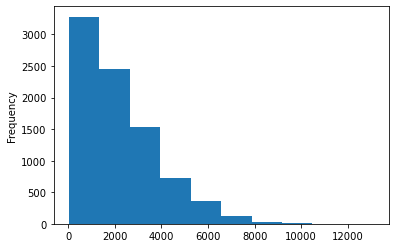

In [53]:
bigmarttraindf.Item_Outlet_Sales.plot(kind='hist')
# Positive Skewness & Kurtosis
print("Skew:",bigmarttraindf.Item_Outlet_Sales.skew())
print("Kurt:",bigmarttraindf.Item_Outlet_Sales.kurt())

<AxesSubplot:>

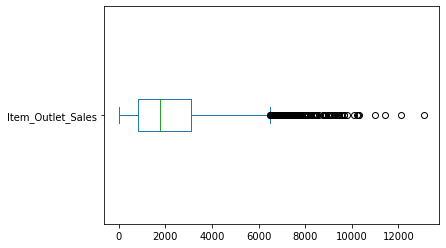

In [54]:
bigmarttraindf.Item_Outlet_Sales.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

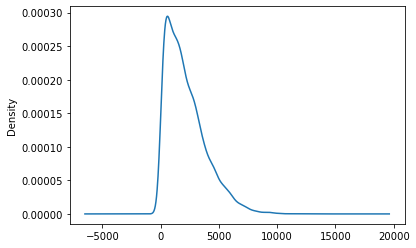

In [55]:
bigmarttraindf.Item_Outlet_Sales.plot(kind='density')

<AxesSubplot:>

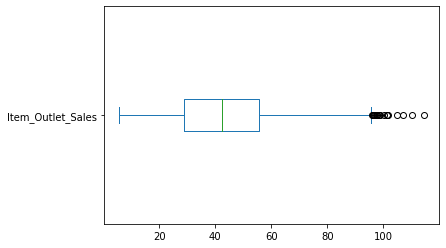

In [56]:
np.sqrt(bigmarttraindf.Item_Outlet_Sales).plot(kind='box',vert=False)

In [57]:
# What is the Average Item_Outlet_Sales of different Item_Fat_Content?
bigmarttraindf.Item_Outlet_Sales.groupby(
    bigmarttraindf.Item_Fat_Content).mean()
# 0 - Low fat & 1 - Regular

Item_Fat_Content
0    2157.711534
1    2224.561170
Name: Item_Outlet_Sales, dtype: float64

In [58]:
bigmarttraindf.Item_Outlet_Sales.groupby(
    bigmarttraindf.Item_Fat_Content).var() # Unequal Variance

Item_Fat_Content
0    2.883115e+06
1    2.963496e+06
Name: Item_Outlet_Sales, dtype: float64

In [59]:
# Hypothesis testing

In [60]:
# Split Data into Lowfat and regular dataframes
lowfat=bigmarttraindf[bigmarttraindf.Item_Fat_Content==0]
regular=bigmarttraindf[bigmarttraindf.Item_Fat_Content==1]

In [61]:
from scipy.stats import ttest_ind

In [62]:
ttest_ind(lowfat.Item_Outlet_Sales,regular.Item_Outlet_Sales,
         equal_var=False)
# Since pvalue=0.08526339464728244 is greater than 0.05, FAIL to 
# REJECT NULL. Difference in means(66.8) is statistically not
# significant and it can be treated as non critical variable

Ttest_indResult(statistic=-1.7212101304652165, pvalue=0.08526339464728244)

In [63]:
# Test Null Average Item_Visibility for different Item_Fat_Content 
# equal?
bigmarttraindf.Item_Visibility.groupby(
    bigmarttraindf.Item_Fat_Content).mean()

Item_Fat_Content
0    0.064330
1    0.069439
Name: Item_Visibility, dtype: float64

In [64]:
bigmarttraindf.Item_Visibility.groupby(
    bigmarttraindf.Item_Fat_Content).var()

Item_Fat_Content
0    0.002619
1    0.002726
Name: Item_Visibility, dtype: float64

In [65]:
ttest_ind(lowfat.Item_Visibility,regular.Item_Visibility,
         equal_var=False)
# Since pvalue=1.404696156360228e-05 is less than 0.05, REJECT NULL
# Hypothesis. Difference in means (0.0005) is statistically
# significant and variable is critical variable

Ttest_indResult(statistic=-4.34668233685042, pvalue=1.404696156360228e-05)

In [66]:
# Test Null Average MRP of different Item_Fat_Content are equal?
bigmarttraindf.Item_MRP.groupby(
    bigmarttraindf.Item_Fat_Content).mean()

Item_Fat_Content
0    140.714098
1    141.504259
Name: Item_MRP, dtype: float64

In [67]:
bigmarttraindf.Item_MRP.groupby(
    bigmarttraindf.Item_Fat_Content).var()

Item_Fat_Content
0    3882.754917
1    3870.679626
Name: Item_MRP, dtype: float64

In [68]:
ttest_ind(lowfat.Item_MRP,regular.Item_MRP,equal_var=False)
# Since pvalue=0.5755481942929463 is greater than 0.05, FAIL to
# REJECT NULL. Difference in means (0.80) is not significant and
# variable is not critical

Ttest_indResult(statistic=-0.5599289442374681, pvalue=0.5755481942929463)

In [69]:
# Anova Single Factor or One Way Anova

# Test Null Average Item_Outlet_Sales for different Outlet_Type is
# equal
# groupby()-mean,Null & Alt Hypo, Split Data, Conduct test, interpret
# Interpretation ia based on p-value similar to above

bigmarttraindf.Item_Outlet_Sales.groupby(
    bigmarttraindf.Outlet_Type).mean()
# 0- Grcery Store, 1 - Super Market Type1 , 2 - Super Market Type1
# 3 - Super Market Type3

Outlet_Type
0     339.828500
1    2316.181148
2    1995.498739
3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [70]:
bigmarttraindf.Item_Outlet_Sales.groupby(bigmarttraindf.Outlet_Size).mean()

Outlet_Size
0    2298.995256
1    2681.603542
2    1822.626947
3    1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [71]:
# Null - There is no Significant difference in Average Item outlet
# Sales for different Outlet Type
# Alt - There is Significant difference in Average Item outlet
# Sales for different Outlet Type

In [72]:
gs=bigmarttraindf[bigmarttraindf.Outlet_Type==0]
st1=bigmarttraindf[bigmarttraindf.Outlet_Type==1]
st2=bigmarttraindf[bigmarttraindf.Outlet_Type==2]
st3=bigmarttraindf[bigmarttraindf.Outlet_Type==3]

In [73]:
from scipy.stats import f_oneway

In [74]:
f_oneway(gs.Item_Outlet_Sales,st1.Item_Outlet_Sales,
        st2.Item_Outlet_Sales,st3.Item_Outlet_Sales)
# Since pvalue=0.0 is less than 0.05, REJECT NULL. Difference in means
# is statistically Significant

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

In [75]:
# Test Null Average Item_Visibility of different Outlet_Type are
# equal?
bigmarttraindf.Item_Visibility.groupby(
    bigmarttraindf.Outlet_Type).mean()

Outlet_Type
0    0.104862
1    0.060723
2    0.061014
3    0.058615
Name: Item_Visibility, dtype: float64

In [76]:
# Null -There is no significant difference in Average Item_Visibility
# of different Outlet_Type
# Alt -There is significant difference in Average Item_Visibility
# of different Outlet_Type

In [77]:
f_oneway(gs.Item_Visibility,st1.Item_Visibility,
        st2.Item_Visibility,st3.Item_Visibility)
# Since pvalue=4.5932234924663505e-158 is less than 0.05, REJECT 
# Null. Difference in Means is Statistically Significant

F_onewayResult(statistic=254.30677497171652, pvalue=4.5932234924663505e-158)

In [78]:
# Chi Square Test of Independence

pd.crosstab(bigmarttraindf.Outlet_Type,bigmarttraindf.Outlet_Size)
# Outlet_Type -  0- Grcery Store, 1 - Super Market Type1 , 
# 2 - Super Market Type1 3 - Super Market Type3
# Outlet_Size - 0- High 1 -Medium 2- Missing 3 - Small

Outlet_Size,0,1,2,3
Outlet_Type,,,,
0,0,0,555,528
1,932,930,1855,1860
2,0,928,0,0
3,0,935,0,0


In [79]:
# Null - There is no Association/Relationship between both variables
# Alt - There is Association/Relationship between both variables

In [80]:
from scipy.stats import chi2_contingency

In [81]:
chi2_contingency(pd.crosstab(bigmarttraindf.Outlet_Type,
                            bigmarttraindf.Outlet_Size))
# Since p-value=0.0, is less than 0.05, REJECT NULL

(5380.286956123782,
 0.0,
 9,
 array([[ 118.42731433,  354.90073918,  306.23372052,  303.43822598],
        [ 609.85146075, 1827.59134108, 1576.97641675, 1562.58078141],
        [ 101.47788337,  304.10700458,  262.40525637,  260.00985568],
        [ 102.24334155,  306.40091517,  264.38460636,  261.97113692]]))

In [82]:
# Test Null There is no Association or Relationship between 
# Outlet_Type and Outlet_Location_Type

In [83]:
pd.crosstab(bigmarttraindf.Outlet_Location_Type,
            bigmarttraindf.Outlet_Type)

Outlet_Type,0,1,2,3
Outlet_Location_Type,,,,
0,528,1860,0,0
1,0,2785,0,0
2,555,932,928,935


In [84]:
chi2_contingency(pd.crosstab(bigmarttraindf.Outlet_Location_Type,
            bigmarttraindf.Outlet_Type))
# Since p-value=0 REJECT NULL

(4725.606588766826,
 0.0,
 6,
 array([[ 303.43822598, 1562.58078141,  260.00985568,  261.97113692],
        [ 353.88419571, 1822.35656459,  303.23594978,  305.52328992],
        [ 425.67757832, 2192.062654  ,  364.75419453,  367.50557315]]))

In [85]:
# Machine Learning Model - Regression

In [86]:
bigmarttraindf.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Outlet_Sales', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Code'],
      dtype='object')

In [87]:
# Multicollinearity
bigmarttraindf[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age','Item_Outlet_Sales']].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales
Item_Weight,1.000000,-0.012582,0.024806,0.004267,0.011083
Item_Visibility,-0.012582,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,0.024806,-0.001315,1.000000,-0.005020,0.567574
Outlet_Age,0.004267,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.011083,-0.128625,0.567574,0.049135,1.000000


In [88]:
# Split data into dependent variable y and independent variable X
y=bigmarttraindf.Item_Outlet_Sales
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1)

In [89]:
X.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,9.30,0.016047,249.8092,22,0,4,9,1,0,1,1
1,5.92,0.019278,48.2692,12,1,14,3,1,2,2,0


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
reg=LinearRegression()

In [92]:
regmodel=reg.fit(X,y)

In [93]:
regmodel.score(X,y) # R square indicated underfitting as the R square is below the required threshold of 0.6-0.95

0.5037944436324737

In [94]:
regpredict=regmodel.predict(X)

In [95]:
regresidual=y-regpredict

In [96]:
np.sqrt(np.mean(regresidual**2)) #RMSE

1202.0195385103325

In [97]:
bigmarttraindf.to_csv("bigmarttrain.csv") #Exporting dataframe

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
tree=DecisionTreeRegressor(max_depth=6)

In [100]:
treemodel=tree.fit(X,y)

In [101]:
treemodel.score(X,y)

0.6121883612629586

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
cross_val_score(tree,X,y)

array([0.59517051, 0.57175009, 0.57209755, 0.60261136, 0.60063837])

In [104]:
np.mean([0.59517051, 0.57182208, 0.57209755, 0.60261136, 0.60063837])

0.5884679740000001

In [105]:
treepredict=treemodel.predict(bigmarttestdf)

In [106]:
pd.DataFrame(treepredict).to_csv("treepredict.csv")

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf=RandomForestRegressor(n_estimators=2000,max_depth=8)

In [109]:
rfmodel=rf.fit(X,y)

In [110]:
rfmodel.score(X,y)

0.6564410328551132

In [111]:
cross_val_score(rf,X,y)

array([0.60494656, 0.5796504 , 0.5695056 , 0.59256858, 0.60411702])

In [112]:
RFpredict=rfmodel.predict(bigmarttestdf)

In [113]:
pd.DataFrame(RFpredict).to_csv('RF.csv')

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
gbm=GradientBoostingRegressor(n_estimators=2000,max_depth=8)

In [116]:
gbmmodel=gbm.fit(X,y)

In [117]:
gbmmodel.score(X,y)

0.9997343397740913

In [118]:
cross_val_score(gbm,X,y)

array([0.49530816, 0.4702461 , 0.43466004, 0.45706145, 0.49694939])

In [119]:
# Model RMSE on competion site
# Decision tree - 1163.815163977208
# Random forest - 1157.7293314244857
# Gradient boosting - Negative sales values

In [121]:
#!pip install xgboost

In [122]:
#XGBOOT
import xgboost as xgb

In [124]:
xgb_reg=xgb.XGBRegressor()

In [125]:
xgb_model=xgb_reg.fit(X,y)

In [126]:
xgb_model.score(X,y)

0.840557883153118